In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# 아이리스 데이터를 가져와서 데이터프레임 만들기
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 사전분석 수행후 x, y 분리
y = iris_df.species #종속변수
x = iris_df.drop('species', axis=1) #독립변수

In [4]:
# 훈련, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=1)

In [5]:
# 의사결정모델
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) # 학습

DecisionTreeClassifier()

In [6]:
# 모델평가
dt.score(x_test, y_test) #accuracy = 0.9666666666666667

0.9666666666666667

In [7]:
# 교차검증
from sklearn.model_selection import cross_val_score
dt_cv = cross_val_score(dt, x_test, y_test, cv=10, scoring='accuracy')

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [8]:
!pip install pydotplus

In [9]:
! pip install graphviz

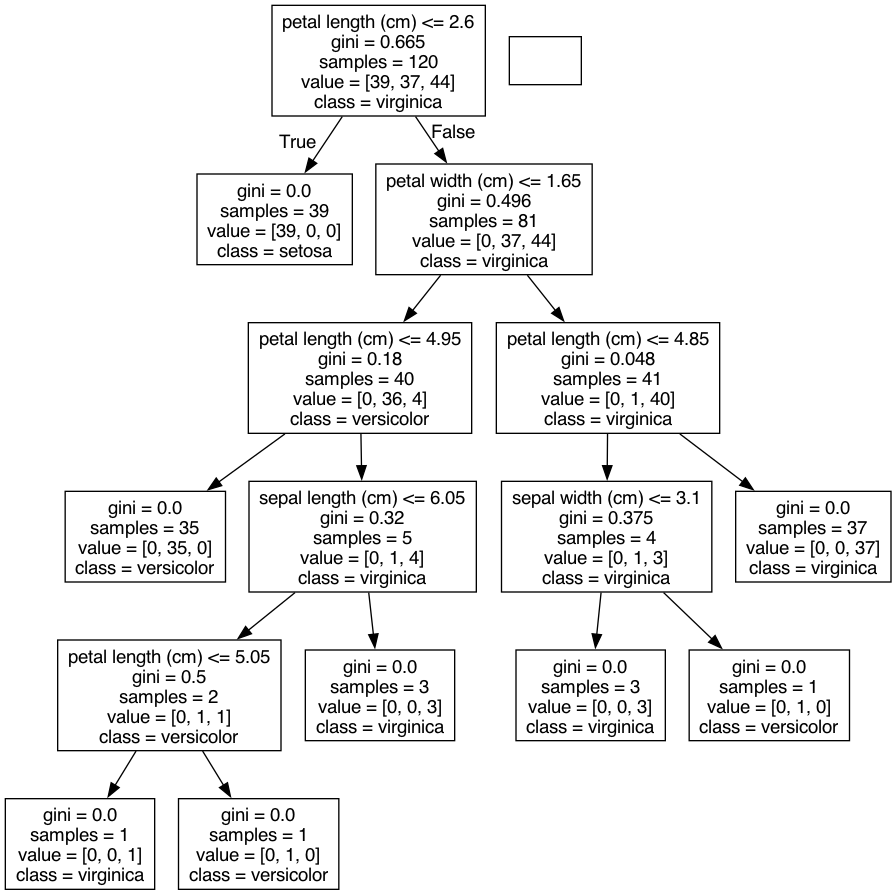

In [10]:
from IPython.display import Image 
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(dt, 
                                out_file=None,feature_names=iris.feature_names,
                                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [16]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

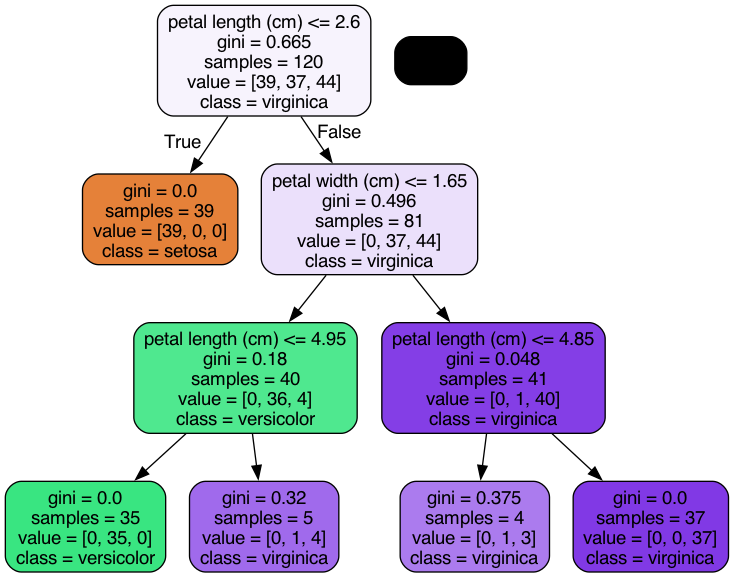

In [17]:
from IPython.display import Image 
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(dt, 
                                out_file=None,feature_names=iris.feature_names,
                                class_names=iris.target_names, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [18]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train) # 학습

RandomForestClassifier()

In [19]:
rf.score(x_test, y_test) #0.9666666666666667

0.9666666666666667

In [20]:
rf_cv = cross_val_score(rf, x_test, y_test, cv=10, scoring='accuracy')
rf_cv

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 0.66666667])

In [21]:
# 선형판별분석
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
lda.score(x_test, y_test) # 정확도 = 1.0

1.0

In [23]:
# 교차검증
lda_cv = cross_val_score(lda, x_test, y_test, cv=10, scoring='accuracy')
lda_cv

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 1.        ])

In [24]:
# 최근접이웃법
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) #학습

KNeighborsClassifier()

In [25]:
knn.score(x_test, y_test) #1.0

1.0

In [26]:
# 교차검증
knn_cv = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy')
knn_cv

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

In [28]:
# 서포트벡터머신
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [29]:
svm.score(x_test, y_test) #0.9666666666666667

0.9666666666666667

In [30]:
# 교차검증
svm_cv = cross_val_score(svm, x_test, y_test, cv=10, scoring='accuracy')
svm_cv

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 0.66666667])

In [31]:
# 비교
tab = pd.DataFrame({
    'DT': dt_cv,
    'RF': rf_cv,
    'LDA': lda_cv,
    'KNN': knn_cv,
    'SVM': svm_cv
})
tab.mean() # LDA, KNN이 가장 성과가 좋음

DT     0.933333
RF     0.933333
LDA    0.966667
KNN    0.966667
SVM    0.933333
dtype: float64

In [32]:
tab.std()

DT     0.140546
RF     0.140546
LDA    0.105409
KNN    0.105409
SVM    0.140546
dtype: float64

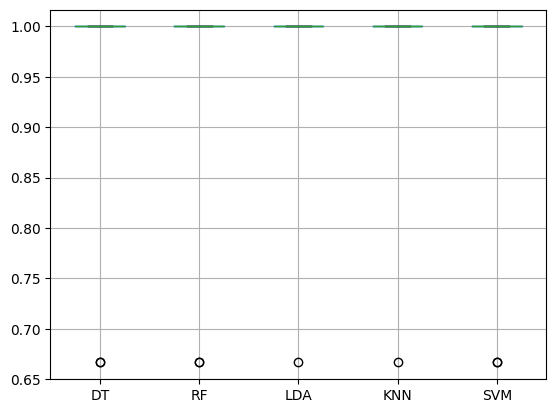

In [33]:
# 박스플랏으로 비교
tab.boxplot()
plt.show()

In [34]:
# 샘플데이터
x_train.iloc[:2]

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3


In [35]:
# 샘플데이터로 예측할 때
lda.predict(x_train.iloc[:2])

array([1, 2])